## Calculating Flux from SpFrame files

This shows three ways to calculate SpFrame Flux

1) spframe/calib

2) spcframe/(corr*distort*R)

3) spframe/fid_calib

I wanted to show that 1 and 2 are exactly the same. The third is using the calibration file for a clear night so that the PSF correction (addition of flux) isn't used on this file

In [4]:
%matplotlib inline
import glob, sys, os
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits

In [13]:
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('serif')
font.set_size('large')

In [4]:
data_dir = '/Volumes/PFagrelius_Backup/sky_data/sky_flux/5956/'
calib_dir = '/Volumes/PARKER/boss_files/raw_files/5399/'

In [5]:
#Get files
sp = fits.open(data_dir+'spFrame-b1-00145334.fits.gz')
spc = fits.open(data_dir+'spCFrame-b1-00145334.fits')
calib1 = fits.open(data_dir+'spFluxcalib-b1-00145334.fits.gz')
calib2 = fits.open(calib_dir+ 'spFluxcalib-b1-00139379.fits.gz')
corr = fits.open(data_dir+'spFluxcorr-b1-00145334.fits.gz')
distort = fits.open(data_dir+'spFluxdistort-5956-56104.fits')

In [6]:
sky_fibs = np.where(sp[5].data['OBJTYPE'] == 'SKY')
sky_fib = sky_fibs[0][0]

In [7]:
spflux1 = sp[6].data[sky_fib]/calib1[0].data[sky_fib]
spflux2 = sp[6].data[sky_fib]/calib2[0].data[sky_fib]
spcflux = spc[6].data[sky_fib][0:len(spflux1)]
logwave = spc[3].data[sky_fib][0:len(spflux1)]

/Users/parkerf/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/parkerf/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


In [8]:
binsize = logwave - np.roll(logwave, 1)
binsize[0] = 0

In [9]:
#Get to spflux from spcframe
start = distort[0].header['CRVAL1']  
stepsize = distort[0].header['CD1_1']
xx = np.arange(start, start+(distort[0].data.shape[1]-1)*stepsize, stepsize)
distort_fit = np.interp(logwave, xx, distort[0].data[sky_fib], left=0, right=0)
R = np.ones(len(distort_fit))*10**-4/binsize

/Users/parkerf/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


In [10]:
spflux3 = spcflux/(corr[0].data[sky_fib][0:len(spflux1)]*distort_fit*R)
wave = (10**logwave)/10.

/Users/parkerf/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/Users/parkerf/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/parkerf/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


(365, 635)

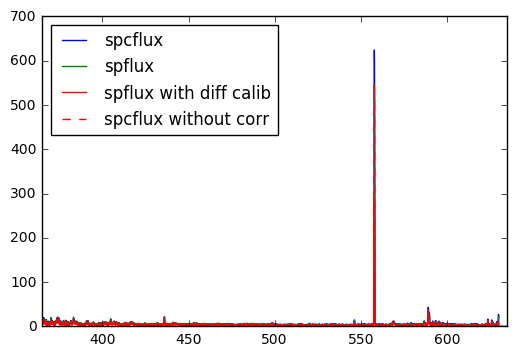

In [15]:
plt.plot(wave, spcflux, 'b-', label = 'spcflux')
plt.plot(wave, spflux1, 'g-', label = 'spflux')
plt.plot(wave, spflux2, 'r-', label = 'spflux with diff calib')
plt.plot(wave, spflux3, 'r--' ,label = 'spcflux without corr')
plt.legend(loc=2)
plt.xlim([365,635])

(0, 8)

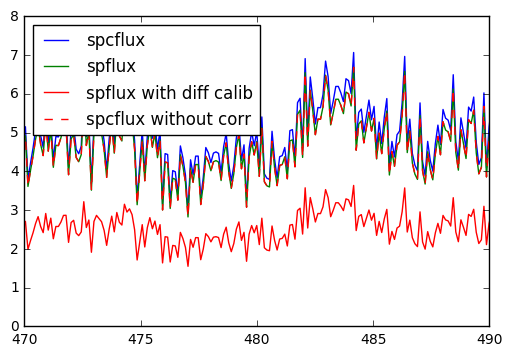

In [16]:
plt.plot(wave, spcflux, 'b-', label = 'spcflux')
plt.plot(wave, spflux1, 'g-', label = 'spflux')
plt.plot(wave, spflux2, 'r-', label = 'spflux with diff calib')
plt.plot(wave, spflux3, 'r--' ,label = 'spcflux without corr')
plt.legend(loc=2)
plt.xlim([470,490])
plt.ylim([0,8])

## Visualizing data from a given plate

In [35]:
DATA_DIR = '/Volumes/PFagrelius_Backup/sky_data/sky_flux/'
files = glob.glob(DATA_DIR+'5399_calibrated_sky.npy')

In [23]:
my_file = np.random.choice(np.array(files),1)[0]

In [36]:
data = np.load(files[0])

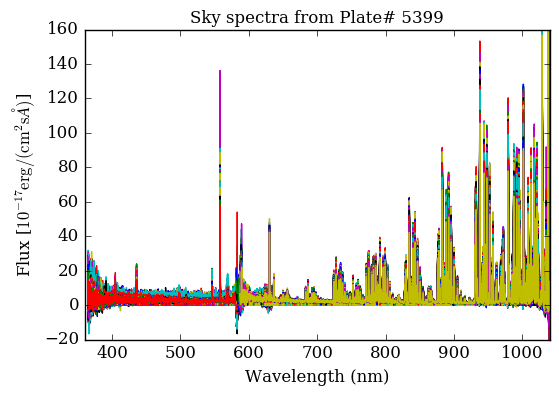

In [37]:
for dd in data:
    plt.plot(dd['WAVE'],dd['SKY'])
    plt.title("Sky spectra from Plate# %s" %str(files[0][-23:-19]), fontproperties=font)
    plt.xlabel("Wavelength (nm)", fontproperties=font)
    plt.ylabel('Flux [$10^{-17}\\mathrm{erg}/(\\mathrm{cm}^2' +
            '\\mathrm{s} \\AA)$]', fontproperties=font)
    plt.xticks(fontproperties=font)
    plt.yticks(fontproperties=font)
    plt.xlim([360,1040])
    plt.ylim([-20,160])
    